In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

df_prelaunch = pd.read_csv("../data/prelaunch_model.csv")

print(df_prelaunch.info())
df_prelaunch.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331675 entries, 0 to 331674
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   category          331675 non-null  object 
 1   main_category     331675 non-null  object 
 2   currency          331675 non-null  object 
 3   goal              331675 non-null  float64
 4   state             331675 non-null  object 
 5   backers           331675 non-null  int64  
 6   country           331675 non-null  object 
 7   usd_pledged_real  331675 non-null  float64
 8   usd_goal_real     331675 non-null  float64
 9   target            331675 non-null  int64  
 10  duration_days     331675 non-null  int64  
 11  launch_month      331675 non-null  int64  
 12  launch_day        331675 non-null  int64  
 13  usd_goal_log      331675 non-null  float64
 14  goal_bin          331675 non-null  object 
 15  duration_bin      331675 non-null  object 
dtypes: float64(4), int64

,goal,backers,usd_pledged_real,usd_goal_real,target,duration_days,launch_month,launch_day,usd_goal_log
count,3.316750e+05,331675.000000,3.316750e+05,3.316750e+05,331675.000000,331675.000000,331675.000000,331675.000000,331675.000000
mean,4.425157e+04,116.381581,9.943461e+03,4.151000e+04,0.403877,32.954902,6.416163,15.285361,3.727388
std,1.117917e+06,965.427268,9.673293e+04,1.108930e+06,0.490674,12.713329,3.306989,8.814445,0.724015
min,1.000000e-02,0.000000,0.000000e+00,1.000000e-02,0.000000,0.000000,1.000000,1.000000,0.004321
25%,2.000000e+03,2.000000,5.000000e+01,2.000000e+03,0.000000,29.000000,4.000000,8.000000,3.301247
50%,5.000000e+03,15.000000,7.880000e+02,5.000000e+03,0.000000,29.000000,6.000000,15.000000,3.699057
75%,1.500000e+04,63.000000,4.608000e+03,1.500000e+04,1.000000,35.000000,9.000000,23.000000,4.176120
max,1.000000e+08,219382.000000,2.033899e+07,1.663614e+08,1.000000,91.000000,12.000000,31.000000,8.221053


In [2]:
#Features based on our EDA will be usd_goal_log, duration_days, launch_month, launch_day, main_category, country

from sklearn.model_selection import train_test_split

X = df_prelaunch[['country', 'main_category', 'duration_days', 'usd_goal_log','launch_month','launch_day']]
y = df_prelaunch[['target']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train value counts:\n", y_train.value_counts(normalize=True))
print("y_test value counts:\n", y_test.value_counts(normalize=True))


X_train shape: (265340, 6)
X_test shape: (66335, 6)
y_train value counts:
 target
0         0.596122
1         0.403878
Name: proportion, dtype: float64
y_test value counts:
 target
0         0.596126
1         0.403874
Name: proportion, dtype: float64


In [3]:
#We will also one hot encode our categorical values which is main_cateogry and country

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['main_category', 'country']
numeric_features = ['usd_goal_log','duration_days','launch_month','launch_day']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"X_train processed shape:{X_train_processed.shape}")
print(f"X_test processed shape: {X_test_processed.shape}")

X_train processed shape:(265340, 42)
X_test processed shape: (66335, 42)


In [4]:
feature_names = preprocessor.get_feature_names_out()
print(feature_names)

['cat__main_category_Art' 'cat__main_category_Comics'
 'cat__main_category_Crafts' 'cat__main_category_Dance'
 'cat__main_category_Design' 'cat__main_category_Fashion'
 'cat__main_category_Film & Video' 'cat__main_category_Food'
 'cat__main_category_Games' 'cat__main_category_Journalism'
 'cat__main_category_Music' 'cat__main_category_Photography'
 'cat__main_category_Publishing' 'cat__main_category_Technology'
 'cat__main_category_Theater' 'cat__country_AT' 'cat__country_AU'
 'cat__country_BE' 'cat__country_CA' 'cat__country_CH' 'cat__country_DE'
 'cat__country_DK' 'cat__country_ES' 'cat__country_FR' 'cat__country_GB'
 'cat__country_HK' 'cat__country_IE' 'cat__country_IT' 'cat__country_JP'
 'cat__country_LU' 'cat__country_MX' 'cat__country_N,0"' 'cat__country_NL'
 'cat__country_NO' 'cat__country_NZ' 'cat__country_SE' 'cat__country_SG'
 'cat__country_US' 'num__usd_goal_log' 'num__duration_days'
 'num__launch_month' 'num__launch_day']


In [4]:
#Develop a baseline model

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Baseline Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Baseline Accuracy: 0.6478781940152257
              precision    recall  f1-score   support

           0       0.67      0.81      0.73     39544
           1       0.59      0.41      0.48     26791

    accuracy                           0.65     66335
   macro avg       0.63      0.61      0.61     66335
weighted avg       0.64      0.65      0.63     66335



In [17]:
#Begin hypertuning to improve the baseline model
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter = 1000, solver = 'liblinear'))
])

param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    cv = 3,
    scoring = 'f1',
    n_jobs = 1
)

grid_search.fit(X_train, y_train.values.ravel())

print(f"Basic Parameters: {grid_search.best_params_}")
print(f"Best F1 score (CV): {grid_search.best_score_}")


Basic Parameters: {'model__C': 1, 'model__class_weight': 'balanced'}
Best F1 score (CV): 0.5860969604666878


In [18]:
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6324564709429411
              precision    recall  f1-score   support

           0       0.72      0.63      0.67     39544
           1       0.54      0.64      0.59     26791

    accuracy                           0.63     66335
   macro avg       0.63      0.63      0.63     66335
weighted avg       0.65      0.63      0.64     66335



In [19]:
#Further tuning of logistical regression

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter = 2000, solver = 'saga'))
])

param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    cv = 3,
    scoring = 'f1',
    n_jobs = 1,
    verbose = 1
)

grid_search.fit(X_train, y_train.values.ravel())

print("Best parameters:", grid_search.best_params_)
print("Best CV F1 score:", grid_search.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'model__C': 10, 'model__class_weight': 'balanced', 'model__penalty': 'l1'}
Best CV F1 score: 0.5861024139024665


In [9]:
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        C = 10,
        penalty = 'l1',
        class_weight = 'balanced',
        solver = 'saga',
        max_iter = 2000
    ))
])

final_pipeline.fit(X_train, y_train.values.ravel())

y_pred = final_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}\n")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.6324

              precision    recall  f1-score   support

           0       0.72      0.63      0.67     39544
           1       0.54      0.64      0.59     26791

    accuracy                           0.63     66335
   macro avg       0.63      0.63      0.63     66335
weighted avg       0.65      0.63      0.64     66335



In [5]:
#The final logsitic regression model did not show major improvements so we move onto a tree-based model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])


In [11]:
rf_pipeline.fit(X_train, y_train.values.ravel())

y_pred_rf = rf_pipeline.predict(X_test)

print(f"Test Accuracy:, {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

Test Accuracy:, 0.6282053214743348
              precision    recall  f1-score   support

           0       0.67      0.73      0.70     39544
           1       0.54      0.48      0.51     26791

    accuracy                           0.63     66335
   macro avg       0.61      0.60      0.61     66335
weighted avg       0.62      0.63      0.62     66335



In [ ]:
param_grid_rf = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__class_weight': [None, 'balanced']
}

grid_search_rf = GridSearchCV(
    estimator = rf_pipeline,
    param_grid = param_grid_rf,
    cv = 3,
    scoring = 'f1',
    n_jobs = 1,
    verbose = 1
)

#Smaller sample size needed due to consistent crashing
X_train_sample = X_train.sample(50000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

grid_search_rf.fit(X_train_sample, y_train_sample.values.ravel())



Fitting 3 folds for each of 32 candidates, totalling 96 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__class_weight': [None, 'balanced'], 'model__max_depth': [None, 10], 'model__min_samples_leaf': [1, 2], 'model__min_samples_split': [2, 5], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time

In [13]:
print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best CV F1 score: {grid_search_rf.best_score_}")

Best parameters: {'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best CV F1 score: 0.594859964827791


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

best_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_leaf=2,
        min_samples_split=2,
        class_weight='balanced',
        random_state=42,
        n_jobs=1
    ))
])

best_rf_pipeline.fit(X_train, y_train.values.ravel())


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

y_pred_rf = best_rf_pipeline.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Test Accuracy: 0.6347629456546318
              precision    recall  f1-score   support

           0       0.73      0.61      0.66     39544
           1       0.54      0.68      0.60     26791

    accuracy                           0.63     66335
   macro avg       0.64      0.64      0.63     66335
weighted avg       0.65      0.63      0.64     66335



In [9]:
#Extract feature names directly
feature_names = best_rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

importances = best_rf_pipeline.named_steps['model'].feature_importances_

fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

fi_df.head(15)


,feature,importance
38,num__usd_goal_log,0.412944
39,num__duration_days,0.205622
10,cat__main_category_Music,0.063669
13,cat__main_category_Technology,0.058066
14,cat__main_category_Theater,0.045189
5,cat__main_category_Fashion,0.029470
7,cat__main_category_Food,0.026791
1,cat__main_category_Comics,0.024413
2,cat__main_category_Crafts,0.014389
41,num__launch_day,0.014376


In [8]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_test_proba = best_rf_pipeline.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.6962


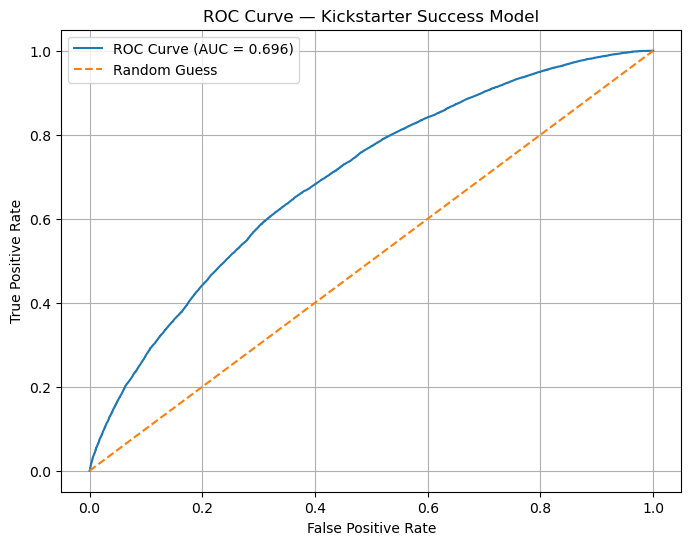

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Kickstarter Success Model")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
fi_df.to_csv('../data/feature_importance.csv', index=False)


In [14]:
top_features_raw = ['usd_goal_log','duration_days','main_category','country','launch_day','launch_month']

dashboard_df = X_train[top_features_raw].copy()
dashboard_df['success'] = y_train.values

dashboard_df.to_csv('../data/dashboard_data.csv', index=False)
